<h1><center>EDA </h1></center>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ydata_profiling as ydp

<h2>Se trabajará con el archivo homicidios </h2>

<h3>Se empezará a trabajar con la hoja "hechos"</h3>

In [55]:
df_hechos = pd.read_excel('\Documentos\PIHM6\PowerBI\homicidios.xlsx',sheet_name = 'HECHOS')
df_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [10]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [11]:
#se comprueba que no haya registros dublicados
filas_duplicadas = df_hechos[df_hechos.duplicated(keep='first')]
numero_de_duplicados = len(filas_duplicadas)
print(f"Número de filas duplicadas: {numero_de_duplicados}")

Número de filas duplicadas: 0


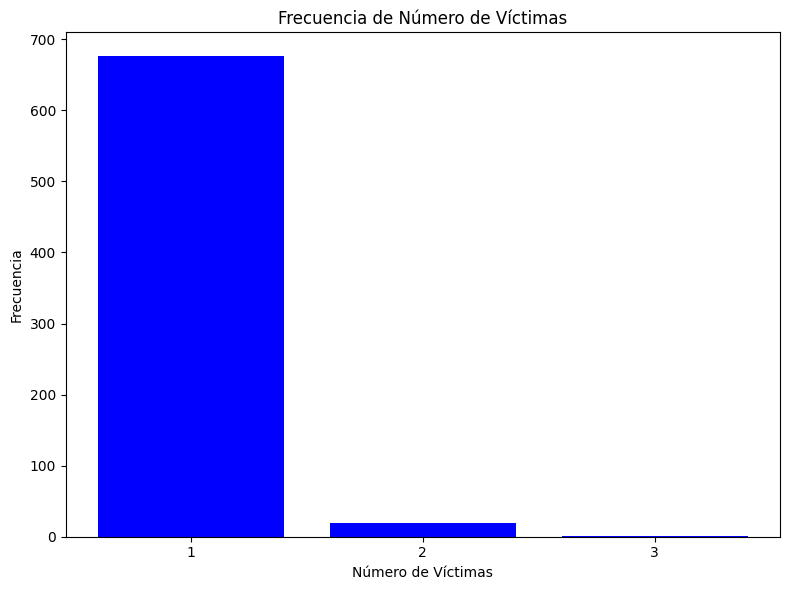

In [12]:
#podemos ver cuanto se repite el numero de victimas con una grafica de barras
categorias = df_hechos['N_VICTIMAS'].unique()
frecuencia = df_hechos['N_VICTIMAS'].value_counts()
# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(frecuencia.index, frecuencia.values, color='blue')
# Agregar etiquetas y título
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Número de Víctimas')
plt.xticks(sorted(frecuencia.index))  # Ordenar las etiquetas del eje x
plt.tight_layout()
plt.show()

In [13]:
valores_faltantes_altura = df_hechos['Altura'].isnull().sum()

porcentaje_faltas = (valores_faltantes_altura * 100)/df_hechos.shape[0]
print(f"El porcentaje de faltas en la variable altura es: {round(porcentaje_faltas, 2)}")

El porcentaje de faltas en la variable altura es: 81.47


Vemos que no hay outliers, solo existe valores en el rango de 1 a 3. <br>
Basado en la info del dataset, sabemos que altura tiene muchos  faltantes, más del 80%, de igual forma pareciera no darnos información relevante (podemos proceder a descartarla).

In [14]:
df_hechos = df_hechos.drop(columns=['Altura'])

Tambien podemos ver que hay muchos faltantes en la columna 'Cruce', sin embargo, esto se debe a que el cruce solo existe cuando el accidente ocurrió en un cruce, podríamos dejarla por si llegara a ser necesaria. <br>
Se va a eliminar todos los registros con faltantes en pos x o pox y, esto debido a que no nos sirven para graficar en el mapa.

In [15]:
print("Datos antes de borrar nulos: ", df_hechos.shape[0])
df_hechos = df_hechos.dropna(subset=['pos x', 'pos y'])
print("Datos despues de borrar nulos: ", df_hechos.shape[0])


Datos antes de borrar nulos:  696
Datos despues de borrar nulos:  696


In [16]:
df_hechos = df_hechos[(df_hechos['pos x'] != '.') & (df_hechos['pos y'] != '.')]
print("Datos despues de borrar . : " , df_hechos.shape[0])


Datos despues de borrar . :  684


In [17]:
#podemos ver cuanto se repite el lugar del hecho (veces en que hubo un accidente en ese lugar)
lugares = df_hechos['LUGAR_DEL_HECHO'].unique()
frecuencia_lugar = df_hechos['LUGAR_DEL_HECHO'].value_counts()

frecuencia_lugar

LUGAR_DEL_HECHO
AV 27 DE FEBRERO Y AV ESCALADA         4
AV AMANCIO ALCORTA Y BONAVENA          2
AV. INDEPENDENCIA Y VIRREY CEVALLOS    2
Rivadavia Av. y Pedernera              2
SAN PEDRITO AV. Y DIRECTORIO AV.       2
                                      ..
VIEYTES Y CRUZ                         1
AU DELLEPIANE Y AV. ESCALADA           1
ALBARIÑO Y AV. ARGENTINA               1
JUAN RAMIREZ DE VELAZCO 1211           1
PADRE CARLOS MUJICA 709                1
Name: count, Length: 671, dtype: int64

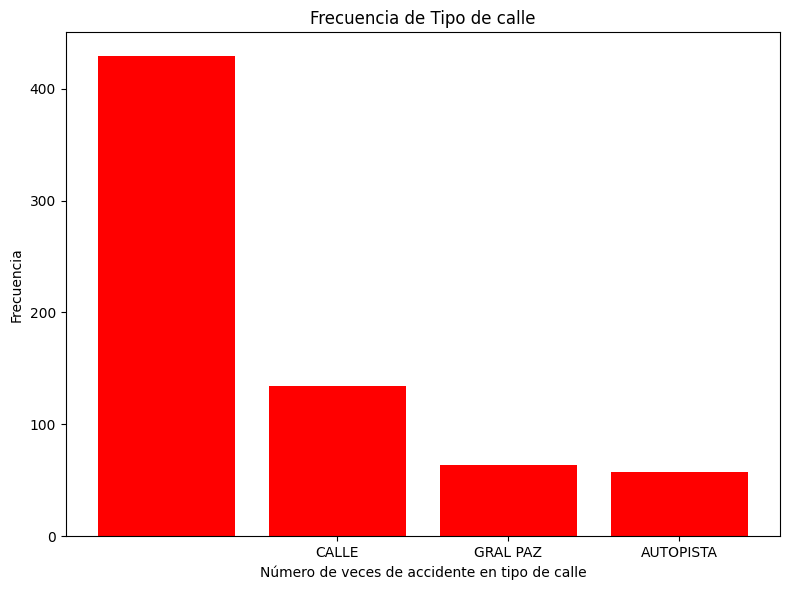

In [18]:
#veremos cuantas veces se repiten los tipos de calle
calles = df_hechos['TIPO_DE_CALLE'].unique()
#sabemos que hay 4 tipos de calle
frecuencia_tipo_calle = df_hechos['TIPO_DE_CALLE'].value_counts()


# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(frecuencia_tipo_calle.index, frecuencia_tipo_calle.values, color='red')
# Agregar etiquetas y título
plt.xlabel('Número de veces de accidente en tipo de calle')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Tipo de calle')
plt.xticks(sorted(frecuencia.index))  # Ordenar las etiquetas del eje x
plt.tight_layout()
plt.show()
#

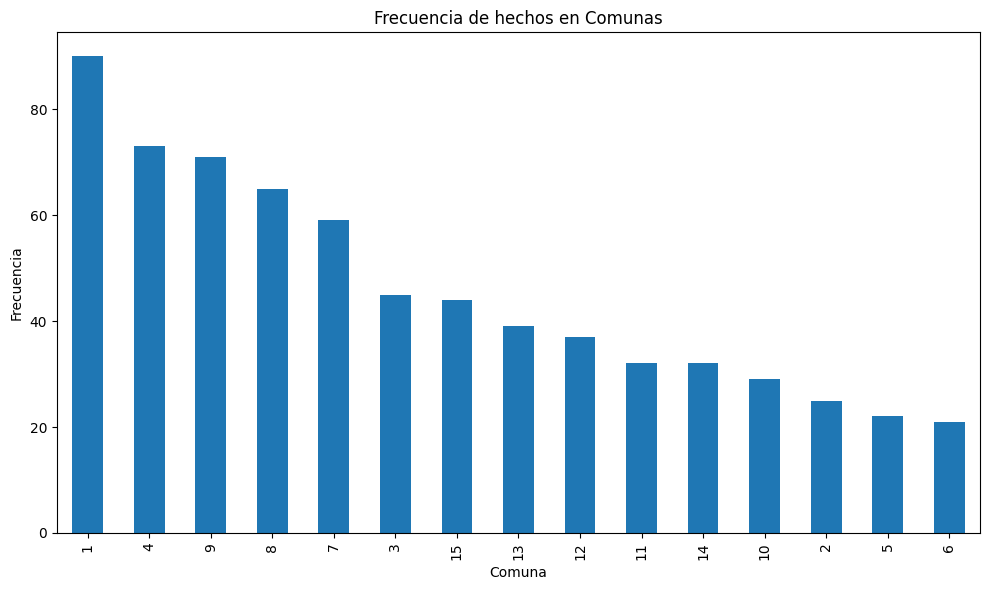

In [19]:
#los datos que nos interesa ver será el tipo de comuna
comunas = df_hechos['COMUNA'].unique()
comunas = sorted(comunas)
#existen 15 comunas
frecuencia_tipo_com = df_hechos['COMUNA'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
frecuencia_tipo_com.plot(kind='bar')

# Agregar etiquetas y título
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de hechos en Comunas')

# Mostrar la gráfica
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()


In [20]:
participantes = df_hechos['PARTICIPANTES'].unique()
participantes

array(['MOTO-AUTO', 'AUTO-PASAJEROS', 'MOTO-SD', 'MOTO-PASAJEROS',
       'MOTO-OBJETO FIJO', 'MOTO-CARGAS', 'PEATON-AUTO', 'PEATON-MOTO',
       'PEATON-PASAJEROS', 'AUTO-AUTO', 'AUTO-OBJETO FIJO',
       'PEATON-CARGAS', 'MOTO-MOTO', 'MULTIPLE', 'SD-SD', 'AUTO-CARGAS',
       'AUTO-SD', 'MOTO-MOVIL', 'CARGAS-CARGAS', 'PEATON-SD',
       'BICICLETA-CARGAS', 'SD-CARGAS', 'BICICLETA-PASAJEROS',
       'PASAJEROS-PASAJEROS', 'MOVIL-PASAJEROS', 'CARGAS-OBJETO FIJO',
       'PEATON-BICICLETA', 'SD-AUTO', 'CARGAS-AUTO', 'BICICLETA-AUTO',
       'MOTO-BICICLETA', 'SD-MOTO', 'MOVIL-CARGAS', 'PASAJEROS-AUTO',
       'AUTO-MOVIL', 'CARGAS-PASAJEROS', 'BICICLETA-TREN',
       'BICICLETA-OTRO', 'MOTO-OTRO', 'PEATON_MOTO-MOTO', 'PASAJEROS-SD'],
      dtype=object)

In [21]:
df_hechos.shape

(684, 20)

In [22]:
#no ocupamos la columna de fecha si ya la tenemos en las columnas AAAA - MM -DD
df_hechos = df_hechos.drop(columns=['FECHA'])
df_hechos.shape

(684, 19)

In [23]:
#No ocupamos XY (CABA), esos valores ya los tenemos en pos x y pos y, los cuales si nos sirven para el dashboard de powerBI
df_hechos = df_hechos.drop(columns=['XY (CABA)'])
df_hechos.shape

(684, 18)

In [28]:
df_hechos.to_csv('df_hechos_EDA.csv', index=False)


<h1> Se tratará la hoja de VICTIMAS </h1>

In [47]:
df_homicidios = pd.read_excel('\Documentos\PIHM6\PowerBI\homicidios.xlsx',sheet_name = 'VICTIMAS')

In [48]:
df_homicidios.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [49]:
# Reemplazar 'SD' por valores nulos
df_homicidios.replace('SD', None, inplace=True)

In [50]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  706 non-null    object        
 6   VICTIMA              708 non-null    object        
 7   SEXO                 711 non-null    object        
 8   EDAD                 664 non-null    object        
 9   FECHA_FALLECIMIENTO  649 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [51]:
df_homicidios = df_homicidios.drop_duplicates()
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  706 non-null    object        
 6   VICTIMA              708 non-null    object        
 7   SEXO                 711 non-null    object        
 8   EDAD                 664 non-null    object        
 9   FECHA_FALLECIMIENTO  649 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [52]:
#ahora si podemos ver cuantos valores nulos tenemos en cada columna
report = ydp.ProfileReport(df_homicidios)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

verificamos que no haya valores faltantes en AAAA,MM, DD, FECHA.<br>
vemos que tenemos valores faltantes para VICTIMA, para ROL, para sexo, edad, fecha de fallecimiento.

In [53]:
df_homicidios.to_csv('df_homicidios_EDA.csv', index=False)
